# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Dataset Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Dataset Introduction
The dataset is about show/no show to doctor appointments
Relevant columns:
- Gender: the gender of the patient (male or female)
- Age: age of the patient
- Scholarship: whether the patient has a scholarship(1) or not(0)
- SMS_received: whether the patient receive an SMS(1) or not(0)
- No-show: whether the patient not show up to the appointment (1) or that they did show up (0)

### Question(s) for Analysis
- Does gender impact showing up to doctor appointments?
- Does age impact showing up to doctor appointments?
- Does having a scholarship impact showing up to doctor appointments?
- Does receiving an SMS impact showing up to doctor appointments?

In [312]:
# importing the necessary libraries
%matplotlib inline 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [313]:
# function to show percentages on bar plots
def display_percent(graph):
    for g in graph.patches:
        width = g.get_width()
        height = g.get_height()
        x, y = g.get_xy() 
        graph.annotate(f'{round(height, 1)}%', (x + width/2, y + height*1.02), ha='center')

<a id='wrangling'></a>
## Data Wrangling

In [314]:
# importing the dataset
df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [315]:
#exploring the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [316]:
#stats about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [318]:
#number of NULL values in the dataset
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [319]:
#finding illogical data
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
- Remove non relevant columns to ease analysis.
- Rename some columns for consistency.
- Remove negative ages because it's logically impossible.
- Change NoShow column data type to int to ease Analysis.
- Replace the age column with age groups to ease analysis.

In [320]:
#removing unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis = 1, inplace = True)

In [321]:
df.head()

,Gender,Age,Scholarship,SMS_received,No-show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


In [322]:
#renaming columns for consistency
df.rename(columns = {'SMS_received':'SMSReceived','No-show':'NoShow'}, inplace = True)

In [323]:
df.head()

,Gender,Age,Scholarship,SMSReceived,NoShow
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,0,No


In [324]:
#deleting the row with an invalid age value
df.drop(index = 99832, inplace = True)

In [325]:
#checking if the row was deleted successfully
df[df['Age']<0]

,Gender,Age,Scholarship,SMSReceived,NoShow


In [326]:
#converting the datatype to int to ease analysis
df['NoShow'] = df['NoShow'].replace({'Yes': 1, 'No': 0})

In [327]:
df.head()

,Gender,Age,Scholarship,SMSReceived,NoShow
0,F,62,0,0,0
1,M,56,0,0,0
2,F,62,0,0,0
3,F,8,0,0,0
4,F,56,0,0,0


In [328]:
#finding the split points fro age
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [329]:
# Splitting the ages into groups based on percentiles
bin = [0, 18, 37, 55, 115]
bin_name = ['18 or younger', '19-37', '38-55', '56 or older']
age_group = pd.cut(df['Age'], bin, labels=bin_name)
df.insert(2, 'AgeGroup', age_group)
df.drop(['Age'], axis=1, inplace=True) #remove age column as it's become obselete

In [330]:
df.head()

,Gender,AgeGroup,Scholarship,SMSReceived,NoShow
0,F,56 or older,0,0,0
1,M,56 or older,0,0,0
2,F,56 or older,0,0,0
3,F,18 or younger,0,0,0
4,F,56 or older,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Does gender impact showing up to doctor appointments?

Text(0.5,1,'Gender percentage in data')

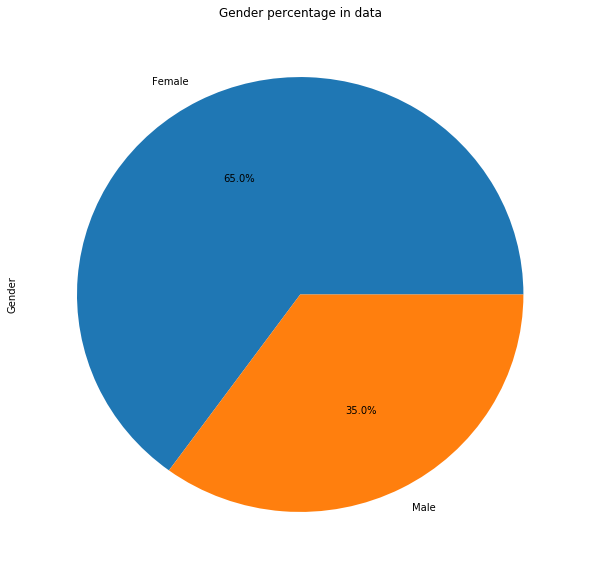

In [331]:
#graphing split in genders based on total number
df['Gender'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', labels = ['Female', 'Male'])
plt.title('Gender percentage in data')

##### The dataset contains nearly two times female to male patients

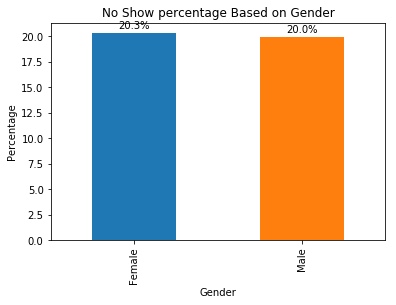

In [332]:
# graphing the relation between gender and No Show
g1 = (df.groupby('Gender')['NoShow'].mean()*100).plot(kind='bar')
plt.title('No Show percentage Based on Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Percentage')
display_percent(g1)

##### Based on the chart above, We can see that The percentage between male and female no show patients is pretty close with the female being just slightly more.
##### So, We conclude that there is no significant correlation between gender and No Show to appointments.

### Does age impact showing up to doctor appointments?

Text(0.5,1,'Age group percentage in data')

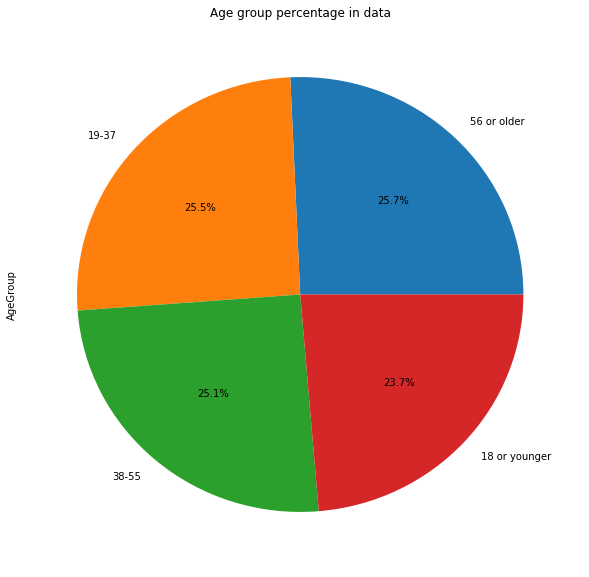

In [333]:
#graphing split in age groups based on total number
df['AgeGroup'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Age group percentage in data')

##### The division is pretty even with regards to age groups in the dataset.

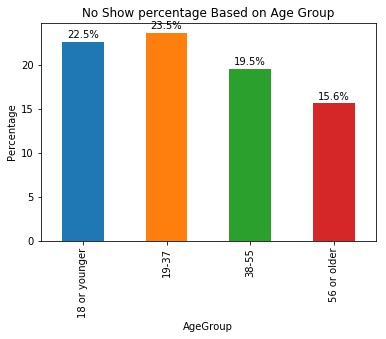

In [334]:
# graphing the relation between Age groups and No Show
g2 = (df.groupby('AgeGroup')['NoShow'].mean()*100).plot(kind='bar')
plt.title('No Show percentage Based on Age Group')
plt.ylabel('Percentage')
display_percent(g2)

##### Based on the chart above, We can see that there is a difference in No Show patients between ages with patients between the ages of 19 and 37 having the highest percentage of missed appointments and the 56 or older group being the least likely to miss an appointment.

### Does having a scholarship impact showing up to doctor appointments?

Text(0.5,1,'Scholarship percentage in data')

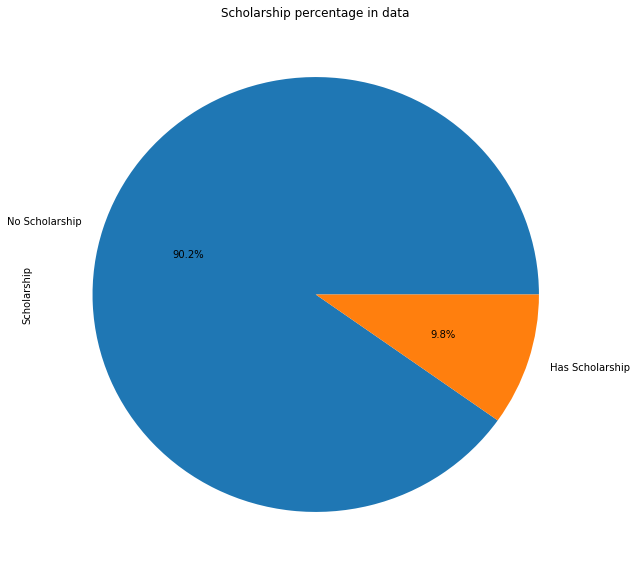

In [335]:
#graphing split in scholarships based on total number
df['Scholarship'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', labels = ['No Scholarship', 'Has Scholarship'])
plt.title('Scholarship percentage in data')

##### Patients with scholarship represent only a small percentage of the total patients.

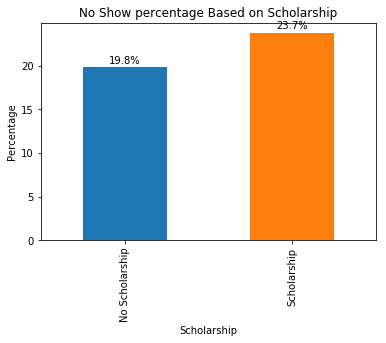

In [336]:
# graphing the relation between having a Scholarship and No Show
g3 = (df.groupby('Scholarship')['NoShow'].mean()*100).plot(kind='bar')
plt.title('No Show percentage Based on Scholarship')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('Percentage')
display_percent(g3)

##### Based on the chart above, We can see that there is a difference in No Show patients between patients with scholarships and those without with the patients with scholarship being more likely to not show up to an appointment.

### Does receiving an SMS impact showing up to doctor appointments?

Text(0.5,1,'SMS Received percentage in data')

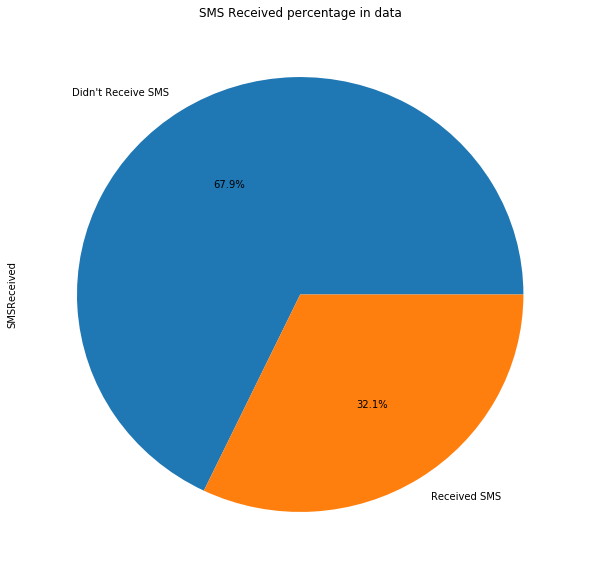

In [337]:
#graphing split in SMS received based on total number
df['SMSReceived'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', labels = ['Didn\'t Receive SMS', 'Received SMS'])
plt.title('SMS Received percentage in data')

##### Only just over one third of the patients received SMS messages.

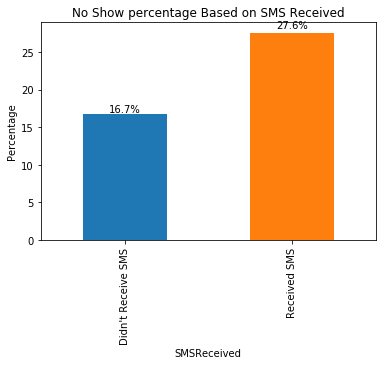

In [338]:
# graphing the relation between SMS received and No Show
g4 = (df.groupby('SMSReceived')['NoShow'].mean()*100).plot(kind='bar')
plt.title('No Show percentage Based on SMS Received')
plt.xticks([0, 1], ['Didn\'t Receive SMS', 'Received SMS'])
plt.ylabel('Percentage')
display_percent(g4)


##### Based on the chart above, We can see that there is a difference in No Show patients between patients who have received an SMS and those who haven't with those who have received an SMS being more likely to not show to an appointment.  

<a id='conclusions'></a>
## Conclusions
Based on the data analysis done:
- Female patients far outnumbered male patients nearly 2:1.
- We found no correlation between gender and showing up to appointments.
- There is an even split between age groups in the dataset.
- We found that age is a big indicator whether a patient will or will not show up to an appointment.
- Patients with scholarships represented just under 10 percent of total patients.
- We found that patients with scholarship are less likely to show up to appointments.
- Only just over a third of patients received an SMS.
- We found that receiving an SMS message might not be the best way to guarentee a patient showing up to an appointment given the fact that more patients who received an SMS message were no show than those who didn't.

## Limitations:
- The data is relatively old.
- The data is based on only one country.
- Exact Time of the appointment wasn't given which could play an important role in the no show to appointments.
- The data spans a relatively short time frame.
- The data has multiple spelling errors and its source can't be verified.
- gender, scholarship and SMS data is highely skewed so we can't be certain that findings of the minority can be trusted. 

### References:
- Stack overflow
- Pandas and matplotlib docs.
- statology
- tutorialspoint

In [340]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0